In [1]:
import os 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Load Data

In [2]:
path = '../data/processed'
df = pd.read_pickle(os.path.join(path,'transactions.pkl'))
articles = pd.read_csv('../data/raw/articles.csv')
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,2,663713001,0.0508,2
1,2018-09-20,2,541518023,0.0305,2
2,2018-09-20,7,505221004,0.0152,2
3,2018-09-20,7,685687003,0.0169,2
4,2018-09-20,7,685687004,0.0169,2


## To-Do List
- Histogram of purchase per transactions
- Repurchase Duration
- Find recency
- Ratio of Inactive Customers

### Histogram of purchase per transactions

In [3]:
temp = df[['t_dat','customer_id','article_id','price','sales_channel_id']]
temp = temp.groupby(['t_dat','customer_id','sales_channel_id']).agg({'article_id':'count','price':sum})

temp.head()

article_id  price
t_dat      customer_id sales_channel_id                   
2018-09-20 2           2                          2 0.0813
           7           2                          5 0.0864
           198         1                          4 0.1448
                       2                          1 0.0457
           203         2                          2 0.0428

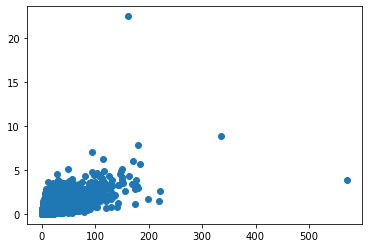

In [4]:
plt.scatter(temp['article_id'],temp['price'])
plt.show()

In [ ]:
# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor(n_neighbors=30, metric='euclidean')
# cluster = lof.fit_predict(temp)
# cluster

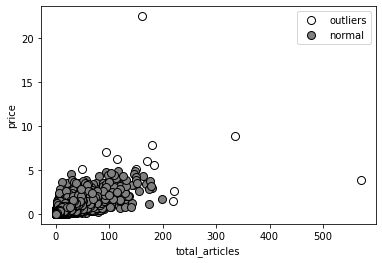

In [11]:
temp['cluster'] = np.where((temp['article_id']>200)|(temp['price']>5), 0, 1)
colors = ['white','grey']
fig = plt.figure()
leg = {0:'outliers',1:'normal'}
for i in range(2):
    plt.plot(temp.loc[temp['cluster']==i, 'article_id'], temp.loc[temp['cluster']==i, 'price'], 'o', mfc=colors[i], ms=8, mec='k', label = leg[i])
plt.xlabel('total_articles')
plt.ylabel('price')
plt.legend()

In [ ]:
temp.article_id.describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

In [ ]:
temp[temp.article_id >200]

In [ ]:
# df[(df.customer_id==1114704)฿].drop_duplicates(subset=['t_dat','customer_id'])

In [ ]:
df[(df.t_dat=='2018-12-17')&((df.customer_id==1044421))].groupby('article_id').agg({'article_id':'count','price':[sum]})

We may romove those transactions that have over 200 articles.

### Repurchase Duration

In [ ]:
temp = df[['t_dat','customer_id']].drop_duplicates(subset=['t_dat','customer_id'])\
            .sort_values(by=['customer_id','t_dat'])\
            .reset_index(drop=True)
temp['Repurchase_duration'] = temp.groupby('customer_id')['t_dat'].diff() / np.timedelta64(1, 'D')
temp.head()

In [ ]:
temp['Repurchase_duration'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

In [ ]:
temp['Repurchase_duration'].hist()

### Channel Ratio

In [ ]:
df.sales_channel_id.value_counts(normalize=True)

### Multiple channel transaction

In [ ]:
df.groupby(['t_dat','customer_id']).agg({'sales_channel_id':'nunique'}).sort_values(by='sales_channel_id',ascending=False)

### Ratio of Inactive Customers

In [13]:
articles.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [ ]:
df.groupby('sales_channel_id').agg({'t_dat':'count'})

In [ ]:
df.sales_channel_id.value_counts(normalize=True)